In [1]:
import pandas as pd
import numpy as np

In [5]:
tunnel = pd.read_csv("Data/tunnel.csv",index_col='Day',parse_dates=['Day']).to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


<Axes: xlabel='Day'>

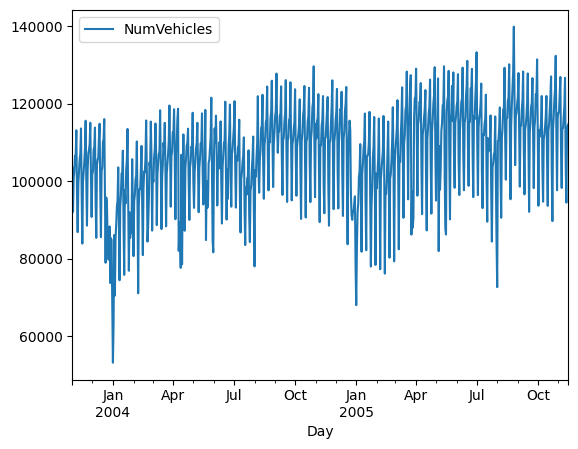

In [6]:
tunnel.plot()

<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}, xlabel='Day'>

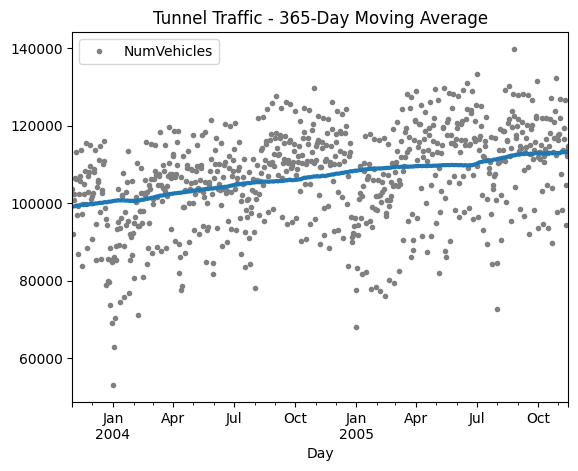

In [23]:
moving_average = tunnel.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
)

In [27]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,
    order=1,
    drop=True
)

In [28]:
X = dp.in_sample()
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [32]:
from sklearn.linear_model import LinearRegression

y = tunnel["NumVehicles"]
model = LinearRegression(fit_intercept=False)
model.fit(X,y)

y_pred = pd.Series(model.predict(X),index=X.index)

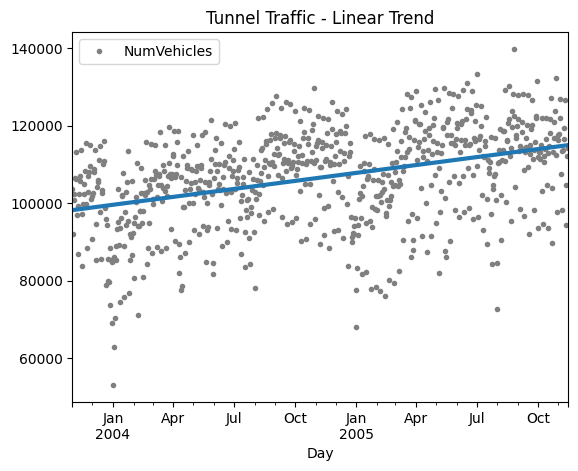

In [33]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

### Making a forecast on out of sample features

In [34]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X),index=X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

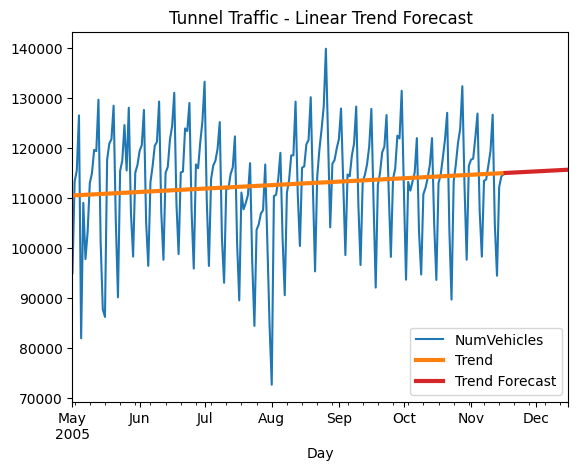

In [36]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast")
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()